# Ashmeet Kaur 
# Task 1: - Predict the percentage of an student based on the no. of study hours. 
# @The Spark Foundation

# Load necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
#import data
link="http://bit.ly/w-data"
data=pd.read_csv(link)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#Check the dimensions of the dataframe
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#Checking the existence of null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Visualize the available dataset on 2D graph

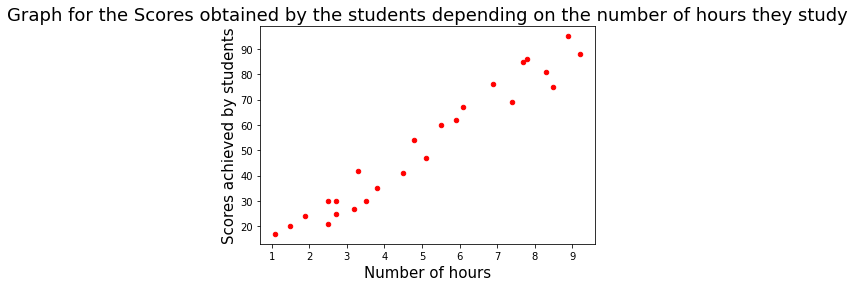

In [6]:
data.plot(x="Hours",y="Scores",kind='scatter',color='red')
plt.ylabel("Scores achieved by students",fontsize=15)
plt.xlabel("Number of hours",fontsize=15)
plt.title("Graph for the Scores obtained by the students depending on the number of hours they study",fontsize=18)
plt.show()

In [7]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [8]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [9]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# split the dataset into train and test dataset

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [11]:
x_train.shape

(20, 1)

In [12]:
x_test.shape

(5, 1)

# Apply Linear Regression on training dataset

In [13]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

# Make predictions on test dataset

In [14]:
prediction=lr_model.predict(x_test)
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
# Comparing Actual vs Predicted
result= pd.DataFrame({"Actual": y_test, "Predicted":prediction})  
result 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Visualize the results

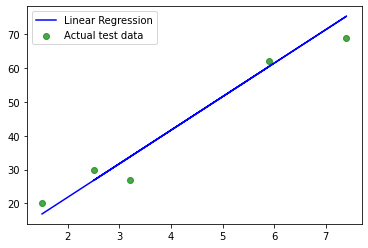

In [16]:
plt.plot(x_test,prediction,label="Linear Regression",color='b')
plt.scatter(x_test,y_test,label="Actual test data",color='g',alpha=0.7)
plt.legend()
plt.show()

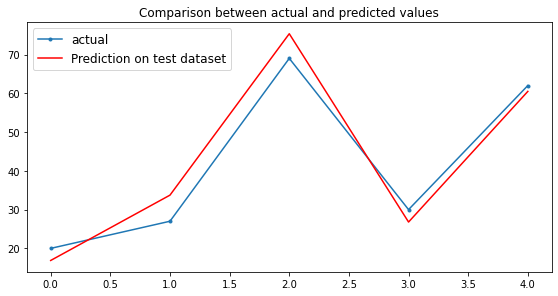

In [17]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.plot(y_test, marker='.', label="actual")
plt.plot(prediction, 'r', label="Prediction on test dataset")
plt.tight_layout()
plt.subplots_adjust(left=0.07)
plt.legend(loc='upper left',fontsize=12)
plt.title("Comparison between actual and predicted values")
plt.show();

In [18]:
h=9.25
h=np.array(h).reshape(1,-1)
h_prediction=lr_model.predict(h)
print("Percentage obatined by the student studying for " +str(h)+" hours is:-",h_prediction)

Percentage obatined by the student studying for [[9.25]] hours is:- [93.69173249]


# Evaluate the model using different criteria 

In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error
print('Mean Absolute Error:',mean_absolute_error(y_test, prediction))
print('Mean Squared Error:', mean_squared_error(y_test,prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
